
<ul><li>Plotting Sigmoid 2D</li>
    <li>Plotting Sigmoid 3D</li>
<li>Contour Plot</li>
<li>Plotting Loss</li>
<li>Standardization</li>
<li>Test/Train split</li>


***Plotting Sigmoid 2D***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math
def sigmoid(X):
    a = []
    for x in X:
        a.append(1/(1+math.exp(-x)))
    return a

In [3]:
XX = np.arange(-10., 10., 0.2)

In [4]:
sig = sigmoid(XX)

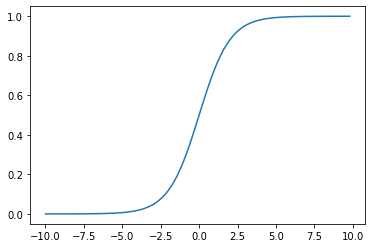

In [5]:
plt.plot(XX,sig)
plt.show()

***Plotting Sigmoid 3D***

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [8]:
X1 = np.linspace(-4, 5, 50)
X2 = np.linspace(-4, 5, 50)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(50,) (50,) (50, 50) (50, 50)


In [9]:
w1 = 2
w2 = -0.5
b = 1
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

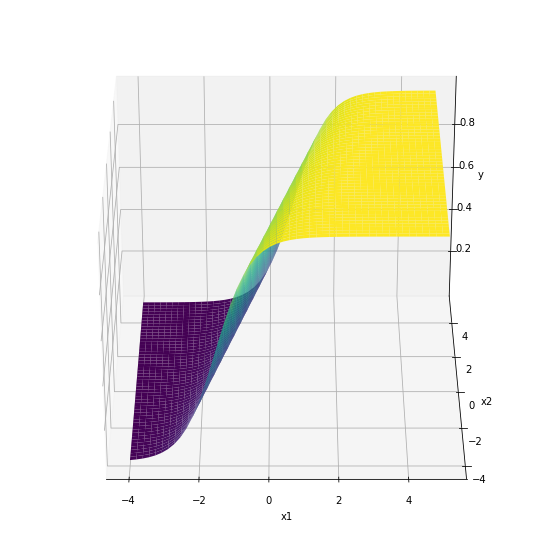

In [10]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


***Contour Plot***

In [12]:
from mpl_toolkits import mplot3d

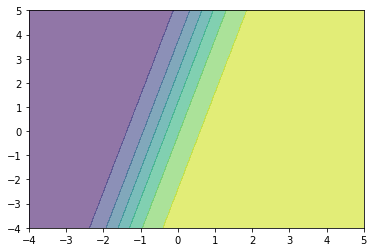

In [13]:
plt.contourf(XX1, XX2, Y, alpha = 0.6)
plt.show()

***Standardization***

In [16]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
X=df.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["species"]=le.fit_transform(df.species)


In [19]:
Y=df['species']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [20]:
#standardize the values in each column
X = (X-X.mean())/X.std()
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


***Test/Train split***

In [21]:
x_test,x_train=np.split(X.sample(frac=1),[8])
print(x_train.shape,x_test.shape)

(142, 4) (8, 4)


In [22]:
y_test,y_train=np.split(Y.sample(frac=1),[8])
print(y_train.shape,y_test.shape)

(142,) (8,)


***Plotting Loss***

In [24]:
import warnings
warnings.filterwarnings("ignore") 
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
model= MLPClassifier(hidden_layer_sizes=(100,),
              activation='relu',
              solver='adam',
              learning_rate='adaptive',
              early_stopping=True)

model.fit(x_train, y_train)
prd_r = model.predict(x_test)
test_acc = accuracy_score(y_test, prd_r) * 100.
loss_values = model.loss_curve_
print (loss_values)


[1.138138373470677, 1.1322609623443693, 1.1269671984968541, 1.122183956928722, 1.1179133547591704, 1.114111221908211, 1.1107417418533372, 1.1077747477414235, 1.1051847377892723, 1.1029462010179567, 1.1010054194658832, 1.0993045368033911, 1.0977998153021211, 1.096450838756041, 1.09522891047121, 1.094089986817195, 1.0930198568533338, 1.0919836164276646, 1.0909525859116354, 1.0899539096780493, 1.0889778974400421, 1.0880161289689292, 1.0870516182237397, 1.0860783971383452]


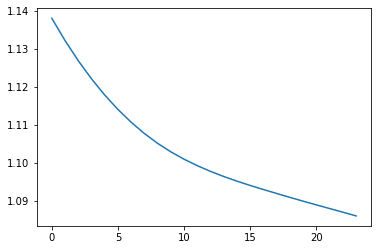

In [25]:
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.show()